In [23]:
# Homework 3 (due 07/16/2024)

# Eigenbears

## Instructions

#### Part 1: Data preparation (ALREADY COMPLETED)
The folder that contains this notebook also contains a data set of pictures of pandas and brown bears. 
1. Load the images for train and test.
2. Reduce their size/resolution by 50%.
3. Convert the colors to grey scale.
4. Display a few of the images. 

#### Part 2: Singular value decomposition (FOR YOU TO COMPLETE)
1. Follow the steps in the eigenfaces tutorial from the UW databook [[link]](https://github.com/dynamicslab/databook_python/blob/master/CH01/CH01_SEC06_2_3_4.ipynb) to perform an SVD on the images.
2. Note that you will need to "center the data" before doing the SVD. Data centering means replacing each variable $X_i$ with a new variable $X_i'$ that is equal to $X_i$ minus $X_i$'s mean value. (Think carefully about whether you want to use the mean of train set, test set, or the full data set for this.)
3. Display the first four "eigenbears" (i.e., the images associated with the first four eigenvectors). Explain what you see.
4. The singular vectors are sometimes called "principal components". Principal component analysis (PCA) is a data analysis method for which one projects high-dimensional data into the subspace of the first two singular vectors. Use the code scaffold provided below do perform PCA for the bears data. What do you notice?

#### Part 3: Non-parametric supervised classification (PARTIALLY FOR YOU TO COMPLETE)
1. Build a $k$-nearest-neighbors model with the train set, and test its accuracy on the test set. (ALREADY COMPLETE)
2. Try different values of $k$ between 1 and 15. For what value do you get the best test accuracy? (FOR YOU TO COMPLETE)
3. Which bears seem to be hard to classify? Display them.
4. What might make them hard to classify?

#### Part 4: Parametric supervised classification (PARTIALLY FOR YOU TO COMPLETE)
1. Try using logistic regression and LDA to classify the bears. 
2. What method gives you the best test accuracy? 
3. How does the result compare to the non-parametric classification?
4. One can use the absolute values of the regression coefficients to see which pixels have the greatest influence on the prediction of the logistic regression. Retrieving the coefficients $\beta_i$ for each pixel $X_i$ and displaying them as an image creates a "bear mask". This notebook includes code for creating that bear mask. Take a look at the bear mask and explain what you see.

#### Part 5: Robustness to additive white noise  (FOR YOU TO RUN AND COMMENT ON)
1. Rerun the code with `add_noise` set to True. The images of the bears should now be very noisy.
2. How does the additive noise affect the test accuracy of the various models and why?
3. How does additive noise affect the eigenbears and the bear mask?
4. Can you think of other types of noise that might affect the classification results differently?

--------------------------------

In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os, time

## Part 1: Data preparation

In [25]:
# toggle settings
add_noise = False

# Initiliaze lists for image collection
train_images = []
test_images = []

for i, images in enumerate([train_images, test_images]):

    # set paths to images of pandas and bears in train and test set
    datasetname = ['Train','Test'][i]
    folder_path1 = 'PandasBears/{}/Pandas/'.format(datasetname)
    folder_path2 = 'PandasBears/{}/Bears/'.format(datasetname)
    

    for folder_path in [folder_path1, folder_path2]:

        # print the name of the folder that is currently being processed
        print(folder_path, end=' ')
        
        # go through all files in the folder
        file_count = 0
        for filename in os.listdir(folder_path):
            
            # find the files that are JPEGs
            if filename.endswith(".jpg") or filename.endswith(".jpeg"):

                # add 1 to the file count
                file_count += 1
                
                # Construct full file path
                file_path = os.path.join(folder_path, filename)
    
                # import image
                image = plt.imread(file_path, format='jpeg')
    
                # convert to gray scale
                image = np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])
    
                # decrease image size by 50%
                image = image[::2,::2]

                if add_noise:
                    # add some noise
                    image = image + np.random.normal(scale=100, size=image.shape)
    
                # add the new image to collection
                images.append(image)

        print('has {} images'.format(file_count))

PandasBears/Train/Pandas/ has 250 images
PandasBears/Train/Bears/ has 250 images
PandasBears/Test/Pandas/ has 50 images
PandasBears/Test/Bears/ has 50 images


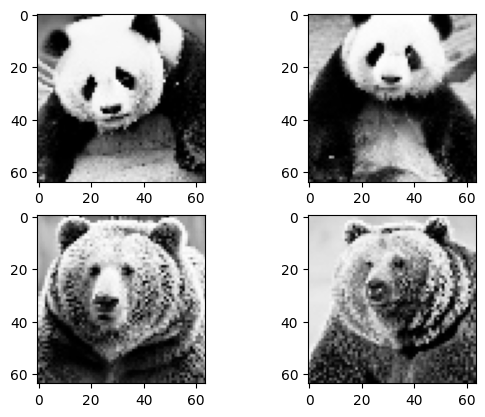

In [26]:
# look at 4 random bears
for i0, i in enumerate(np.random.randint(0, 500, size=4)):
    plt.subplot(2,2,1+i0)
    plt.imshow(train_images[i][::2,::2],cmap='Greys_r')

# Part 2: Singular value decomposition

(16384, 16384)


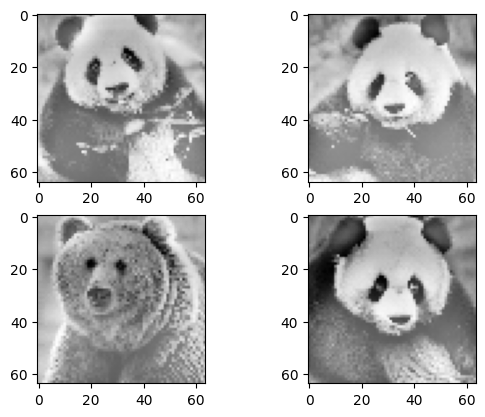

In [27]:
# Construct data matrix of centered data
# Calculate and plot average bear
avgBear = np.mean(train_images,axis=0)
#plt.subplot(1,1,1)
#plt.imshow(avgBear,cmap='Greys_r')

# Subtract average bear
mc_train_images = train_images - avgBear

# Plot 4 random mean-centerd bears
for i0, i in enumerate(np.random.randint(0, 500, size=4)):
    plt.subplot(2,2,1+i0)
    plt.imshow(mc_train_images[i][::2,::2],cmap='Greys_r')

mc_flat_ti = [None] * 500
# flatten faces into vectors
for i in range(500):
    mc_flat_ti[i] = np.array(mc_train_images[i]).flatten()
mcf_train_images = np.array(mc_flat_ti).T

# Perform SVD
U, S, Vh = np.linalg.svd(mcf_train_images) # replace A with your centered data matrix - need to reshape so they're column vectors??
print(U.shape)

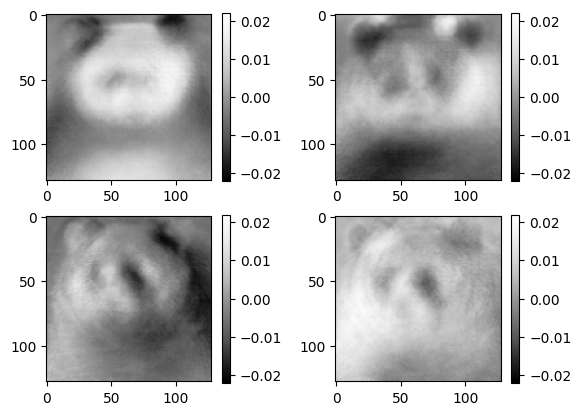

In [28]:
# show the first four eigenbears
for i in range(4):
    plt.subplot(2,2,1+i)
    plt.imshow((U[:,i]).reshape((128,128)), cmap='Greys_r',
        # force colormap to be the same for all four
        vmin=-np.max(np.abs(U[:,:4])),
        vmax=np.max(np.abs(U[:,:4])))
    plt.colorbar()
plt.subplots_adjust(wspace=0.4)

1. Display the first four "eigenbears" (i.e., the images associated with the first four eigenvectors). Explain what you see.

The most distinct features that appear in the eigenbears are the ears and the eyes. There is some alternation that appears: the first eigenbear has a light patch on the bottom of the image (the belly area), while the second eigenbear is dark in that area. The upper face exhibits the same pattern. The same can be seen on the right edge comparing the second and third eigenbears. 

2. The singular vectors are sometimes called "principal components". Principal component analysis (PCA) is a data analysis method for which one projects high-dimensional data into the subspace of the first two singular vectors. Use the code scaffold provided below do perform PCA for the bears data. What do you notice?

The grizzlies are much more tightly grouped than the pandas when projected onto the subspace of the first two singular vectors (see below). This suggests that fairly accurate classification could be achieved by using just these two principal components and classifying images as grizzly or not-grizzly (panda).

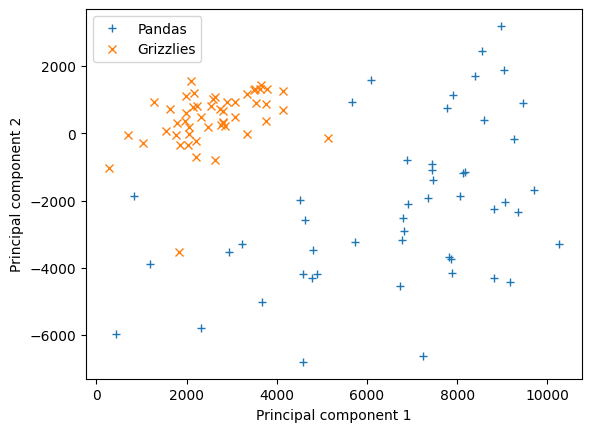

In [29]:
# Clustering of panda bears and brown bears along the first and second principal component
# indices of pandas in the test set
indices_pandas = range(50)
# indices of brown bears in the test set
indices_brownbears = range(50,100)

for i, indices in enumerate([indices_pandas, indices_brownbears]):
    # get projections of data onto principal component 1
    p1 = [np.dot(U[:,0],np.ravel(test_images[x])) for x in indices]
    # get projections of data onto principal component 2
    p2 = [np.dot(U[:,1],np.ravel(test_images[x])) for x in indices]
    plt.plot(p1, p2, marker='+x'[i], lw=0, label=['Pandas', 'Grizzlies'][i])

# annotate axes
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
# add legend
plt.legend()

# Part 3: Nonparametric classification

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
# construct response variable: Train set was created by appending 250 pandas
# and THEN 250 brown bears to the list of training images. We code pandas as
# '0' and brown bears as '1'.
y_train =  np.concatenate([np.zeros(250), np.ones(250)])

# Test set was created by appending 50 pandas and THEN 50 brown bears to the 
# list of test images. We code pandas as '0' and brown bears as '1'.
y_test = np.concatenate([np.zeros(50), np.ones(50)])

In [32]:
flat_ti = [None] * 500
# flatten faces into vectors
for i in range(500):
    flat_ti[i] = np.array(train_images[i]).flatten()
f_train_images = np.array(flat_ti)

print('   k\t|  # errors\t| misclassified bears')
print('--------------------------------------------')
err_indices = []
for k in range(1,16):
    # fit KNN model
    modelKN = KNeighborsClassifier(n_neighbors=k).fit(f_train_images, y_train)
    # use model to make predictions on the test set
    predictions = []
    for i in range(len(y_test)):
        predictions.append(modelKN.predict([np.ravel(test_images[i])]))
    # detect misclassifications
    errors = np.abs((np.array(predictions).T)[0]-y_test)
    # print results to table
    print('    {}\t|      {} \t| {}'.format(k, int(np.sum(errors)), (np.argwhere(errors).T)[0]))

   k	|  # errors	| misclassified bears
--------------------------------------------
    1	|      1 	| [39]
    2	|      0 	| []
    3	|      2 	| [39 42]
    4	|      1 	| [42]
    5	|      3 	| [36 39 42]
    6	|      2 	| [36 42]
    7	|      4 	| [22 36 41 42]
    8	|      2 	| [22 42]
    9	|      4 	| [ 6 22 36 42]
    10	|      3 	| [ 6 22 42]
    11	|      4 	| [ 6 22 41 42]
    12	|      4 	| [ 6 22 41 42]
    13	|      5 	| [ 6 22 39 41 42]
    14	|      5 	| [ 6 22 39 41 42]
    15	|      7 	| [ 6 11 22 24 39 41 42]


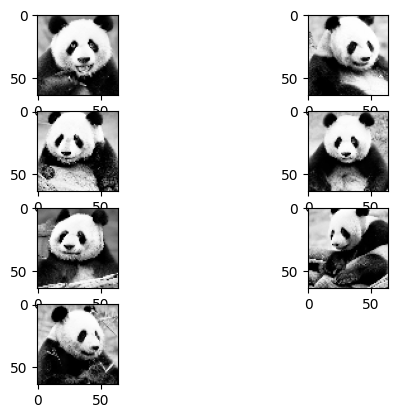

In [33]:
# Show hard-to-classify bears
err_indices = (np.argwhere(errors).T)[0]

for i in range(len(err_indices)):
    plt.subplot(int(np.ceil(len(err_indices)/2)),2,1+i)
    plt.imshow(test_images[i][::2,::2],cmap='Greys_r')


1. For what value of k do you get the best test accuracy? 

K = 2 gives the best (100%) test accuracy, while K=1 and K=4 are the second-best with only one error.

2. Which bears seem to be hard to classify? What might make this the case?

The harder-to-classify bears seem to be pandas where more of the bear besides the face is in the image frame, and/or where the bear is turned slightly away from the camera.

# Part 4: Parametric classification

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

 Logistic Regression Results:
 # errors: 0 	 misclassified bears: []
 LDA Results:
 # errors: 1 	 misclassified bears: [72]


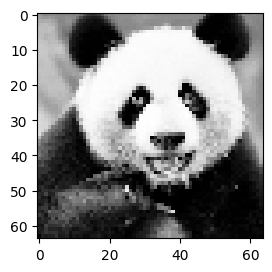

In [35]:
'''ADD SOME CODE'''
modelLog = LogisticRegression().fit(f_train_images,y_train)
# use model to make predictions on the test set
predictions = []
for i in range(len(y_test)):
  predictions.append(modelLog.predict([np.ravel(test_images[i])]))
  # detect misclassifications
errors = np.abs((np.array(predictions).T)[0]-y_test)
# print results
print(' Logistic Regression Results:')
print(' # errors: {} \t misclassified bears: {}'.format(int(np.sum(errors)), (np.argwhere(errors).T)[0]))
# Show hard-to-classify bears
err_indices = (np.argwhere(errors).T)[0]

for i in range(len(err_indices)):
    plt.subplot(int(np.ceil(len(err_indices)/2)),2,1+i)
    plt.imshow(test_images[i][::2,::2],cmap='Greys_r')

modelLDA = LinearDiscriminantAnalysis().fit(f_train_images,y_train)
# use model to make predictions on the test set
predictionslda = []
for i in range(len(y_test)):
  predictionslda.append(modelLDA.predict([np.ravel(test_images[i])]))
  # detect misclassifications
errors = np.abs((np.array(predictionslda).T)[0]-y_test)
# print results
print(' LDA Results:')
print(' # errors: {} \t misclassified bears: {}'.format(int(np.sum(errors)), (np.argwhere(errors).T)[0]))
# Show hard-to-classify bears
err_indices = (np.argwhere(errors).T)[0]

for i in range(len(err_indices)):
    plt.subplot(int(np.ceil(len(err_indices)/2)),2,1+i)
    plt.imshow(test_images[i][::2,::2],cmap='Greys_r')



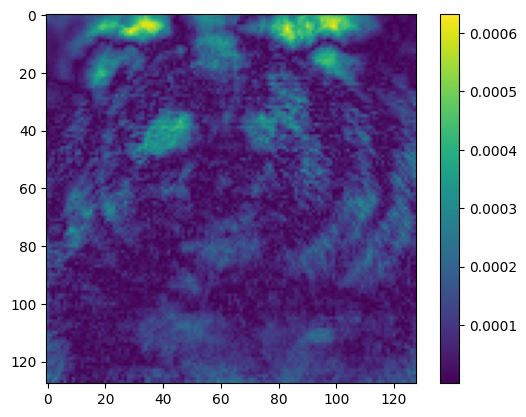

In [36]:
# Construct the bear mask:
# Show absolute value of logistic-regression coefficients for each pixel
plt.imshow(np.abs((modelLog.coef_).reshape((128,128))))
plt.colorbar()

1. What method gives you the best test accuracy? 

Logistic Regression has 100% test accuracy (no errors in classification for 100 test images). LDA is very close behind, with 99% test accuracy.

2. How does the result compare to the non-parametric classification?

These results are similar to k-nearest neighbors for k = 2 (100% test accuracy), and k = 1 and 4 (99% test accuracy)

3. Take a look at the bear mask and explain what you see.

Yellow areas have the largest magnitude coefficients, meaning those areas provide the most information about whether the bear is a panda or a grizzly. Primarily around the ears, and to a lesser extent, the eyes, is the most important area of the image for classification. 

4. Comments after running code with noise introduced into images:

The regular images of the bears now look like they're being shown on a really old staticky TV. There is a lot more grey and a lot less black and white. Some of the eigenbears appear inverted: the first one has a black face and white ears. They are slightly more blurry than without noise, but not by a lot. The plot of principal components looks very similar except that the axes have swapped. The grizzlies are still clustered much closer together than the pandas. For the non-parametric approach, k=2 still produces 100% test accuracy, and k = 4 produces 99% test accuracy, but most other values of k have one or two extra errors compared to the no-noise case. Interestingly, k = 15 actually has fewer errors. The problem images are generally the same ones as in the no-noise case. For parametric methods, Logistic Regression drops from 100% to 99% test accuracy when noise is added, while LDA remains at 99%. The problem image is not the same as the no-noise case, but is the same for both parametric methods in the noisy case. The bear mask shows the same general areas of importance (ears and eyes) but is much more pixelated and poorly defined.